In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/datasets/insurance.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,usd,inr,charges
0,19,female,27.900,0,yes,southwest,16884.92400,2110.615500,159942.44260
1,18,male,33.770,1,no,southeast,1725.55230,215.694038,16345.29416
2,28,male,33.000,3,no,southeast,4449.46200,556.182750,42147.52880
3,33,male,22.705,0,no,northwest,21984.47061,2748.058826,208247.89790
4,32,male,28.880,0,no,northwest,3866.85520,483.356900,36628.78588


In [ ]:
# number of rows and columns
insurance_dataset.shape

(1338, 9)

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   usd       1338 non-null   float64
 7   inr       1338 non-null   float64
 8   charges   1338 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 94.2+ KB


In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
usd         0
inr         0
charges     0
dtype: int64

In [ ]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,usd,inr,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,1658.802783,125704.074906
std,14.049960,6.098187,1.205493,12110.011237,1513.751405,114712.081440
min,18.000000,15.960000,0.000000,1121.873900,140.234238,10626.950520
25%,27.000000,26.296250,0.000000,4740.287150,592.535894,44902.370025
50%,39.000000,30.400000,1.000000,9382.033000,1172.754126,88871.307590
75%,51.000000,34.693750,2.000000,16639.912515,2079.989064,157621.571275
max,64.000000,53.130000,5.000000,63770.428010,7971.303501,604065.379300


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


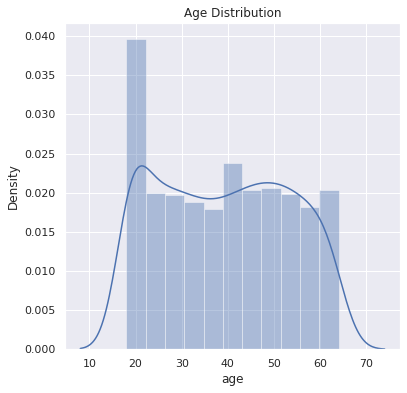

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

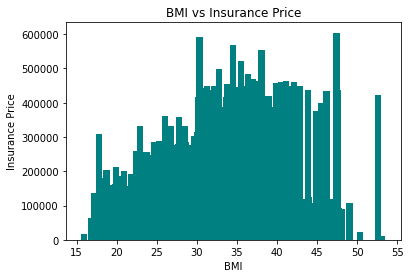

In [ ]:
price = insurance_dataset['charges']
bmi = insurance_dataset['bmi']
plt.bar(bmi, price, color= 'teal')
plt.title("BMI vs Insurance Price")
plt.xlabel("BMI")
plt.ylabel("Insurance Price")
plt.show()

In [ ]:
smo_ = insurance_dataset[['smoker', 'charges']]

In [ ]:
smo_.head(-10)

,smoker,charges
0,0,159942.44260
1,1,16345.29416
2,1,42147.52880
3,1,208247.89790
4,1,36628.78588
...,...,...
1323,0,415808.42450
1324,1,40162.38313
1325,1,124500.25640
1326,1,66781.32676


In [ ]:
smo_0 = smo_.drop(index = smo_[smo_['smoker'] == 1].index)
smo_0.head(20)

,smoker,charges
0,0,159942.4426
11,0,263418.1485
14,0,375222.3748
19,0,348942.9062
23,0,357131.0280
29,0,366689.9475
30,0,337084.3687
34,0,484940.4615
38,0,376761.8323
39,0,456322.1621


In [ ]:
smo_1 = smo_.drop(index = smo_[smo_['smoker'] == 0].index)
smo_1.head(20)

,smoker,charges
1,1,16345.29416
2,1,42147.52880
3,1,208247.89790
4,1,36628.78588
5,1,35584.59811
6,1,78058.98499
7,1,68974.06180
8,1,60684.72536
9,1,273974.41450
10,1,25777.71128


TypeError: ignored

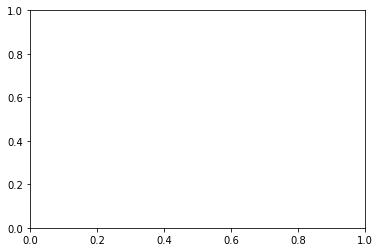

In [ ]:
plt.plot(smo_1['smoker'], smo_0['smoker'], data=smo_0['charges'], color = 'red')
#plt.scatter(smo_1, color = 'green')
plt.show()

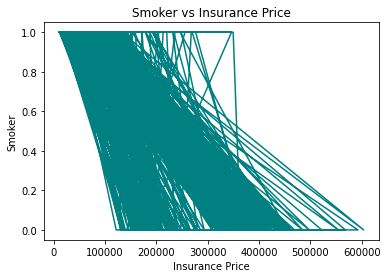

In [ ]:
price = insurance_dataset['charges']
smo = insurance_dataset['smoker']
plt.(price, smo, color= 'teal')
# plt.plot(smo, color= 'red')
plt.title("Smoker vs Insurance Price")
plt.ylabel("Smoker")
plt.xlabel("Insurance Price")
plt.show()

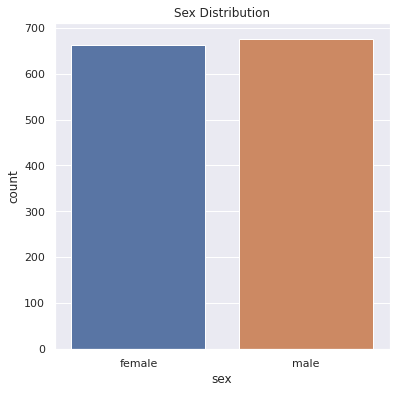

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


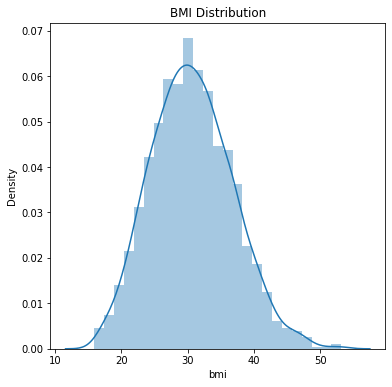

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

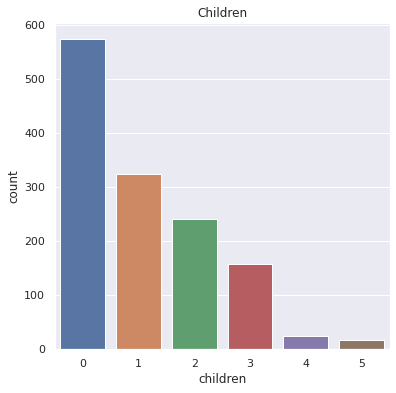

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

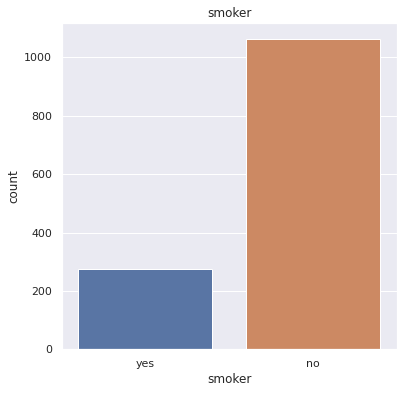

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

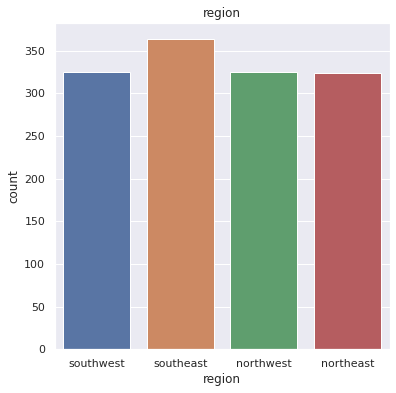

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

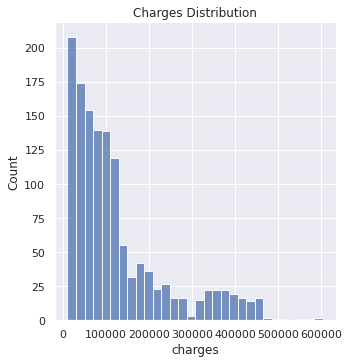

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
X = insurance_dataset.drop(columns=['charges', 'usd', 'inr'], axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       159942.44260
1        16345.29416
2        42147.52880
3       208247.89790
4        36628.78588
            ...     
1333    100413.69380
1334     20896.15313
1335     15438.59783
1336     19020.25901
1337    276041.53540
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


Model Training

Linear Regression

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0)

Lasso

In [ ]:
from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
regressor = Lasso(normalize=True)

Ridge

In [ ]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 1.0)

Model.fit


In [ ]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.9775762352140159


In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.8508147334000234


Test

In [ ]:
input_data = (20,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)
res = str(round(prediction[0], 2))
print('The insurance cost is Rs {}'.format(res))

[17587.5699201]
The insurance cost is Rs 17587.57


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pickle

In [ ]:
filename = 'finalized_insurance_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
print(loaded_model.score(X_test, Y_test))

0.8508147334000234
